# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [ ]:
df.info(), df.isna().sum()

## 2) Numeric profile

In [ ]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

## 3) Distributions (TODO: add at least 3)

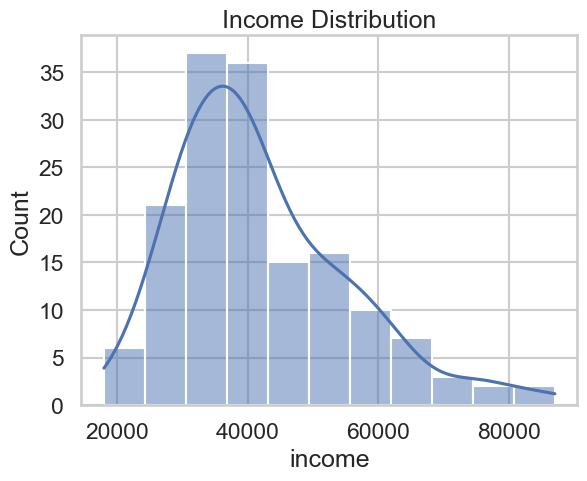

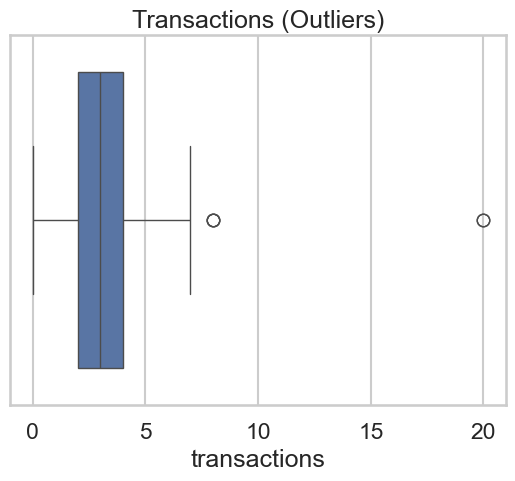

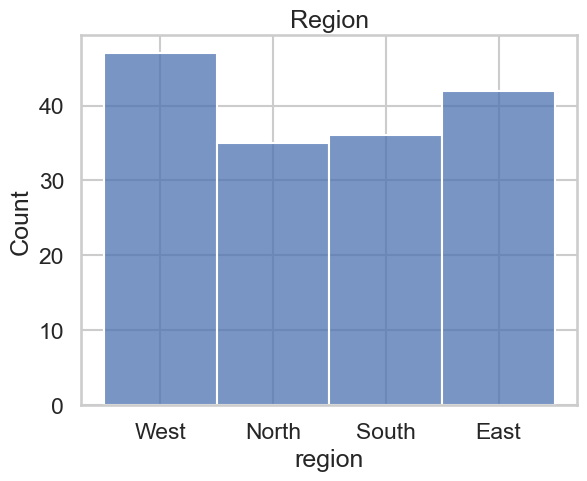

In [11]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

sns.histplot(x=df['region'])
plt.title('Region')
plt.show()



## 4) Relationships (TODO: add at least 2)

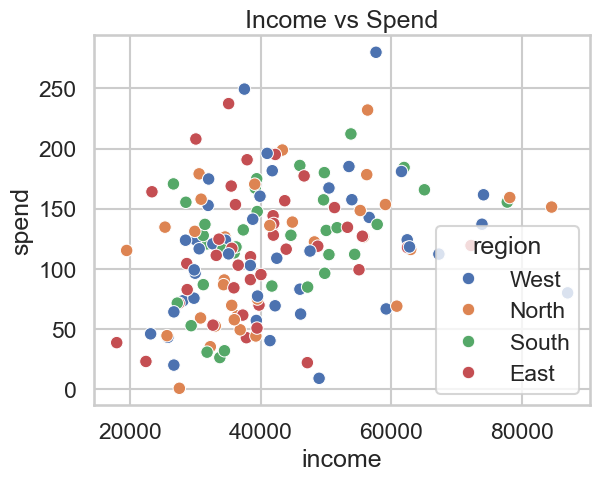

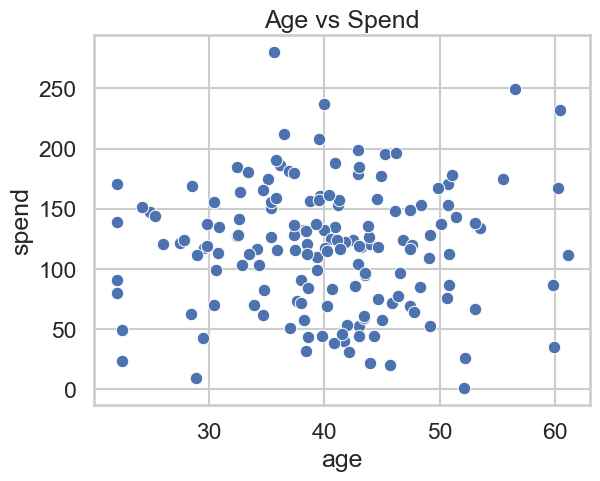

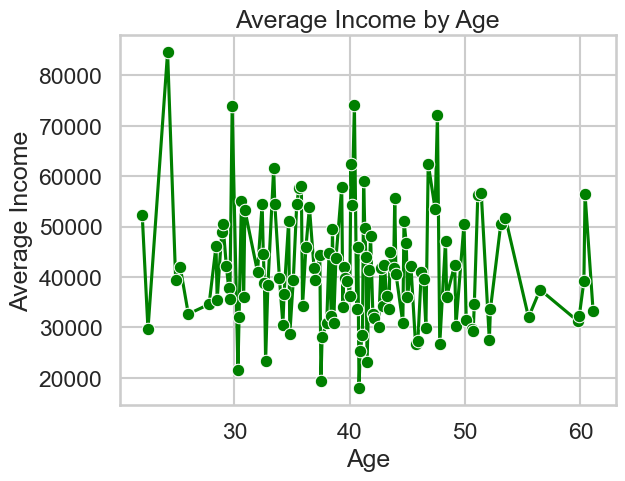

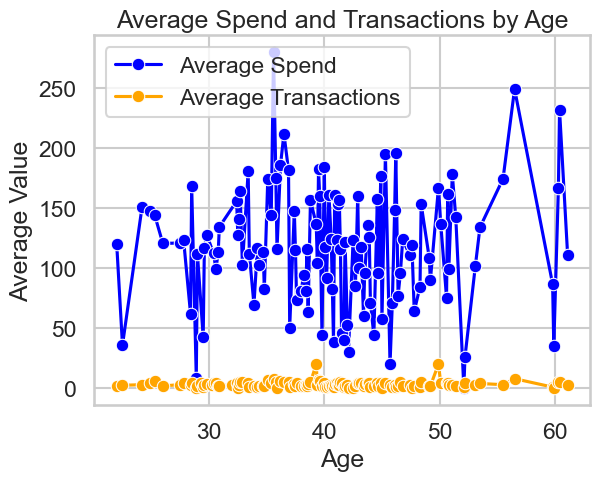

In [15]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

df_age_income = df.groupby('age')['income'].mean().reset_index()
sns.lineplot(data=df_age_income, x='age', y='income', marker='o', color='green')
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

df_age = df.groupby('age')[['spend','transactions']].mean().reset_index()
sns.lineplot(data=df_age, x='age', y='spend', marker='o', label='Average Spend', color='blue')
sns.lineplot(data=df_age, x='age', y='transactions', marker='o', label='Average Transactions', color='orange')

plt.title('Average Spend and Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

## 5) (Optional) Correlation matrix

In [ ]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

In [21]:
import pandas as pd

# --- Average spend by age ---
avg_spend_age = df.groupby('age')['spend'].mean().reset_index().rename(columns={'spend':'avg_spend'})
top5_age_spend = avg_spend_age.sort_values('avg_spend', ascending=False).head()
bottom5_age_spend = avg_spend_age.sort_values('avg_spend', ascending=True).head()

# --- Average spend by income ---
avg_spend_income = df.groupby('income')['spend'].mean().reset_index().rename(columns={'spend':'avg_spend'})
top5_income_spend = avg_spend_income.sort_values('avg_spend', ascending=False).head()
bottom5_income_spend = avg_spend_income.sort_values('avg_spend', ascending=True).head()

# --- Average income by age ---
avg_income_age = df.groupby('age')['income'].mean().reset_index().rename(columns={'income':'avg_income'})
top5_age_income = avg_income_age.sort_values('avg_income', ascending=False).head()
bottom5_age_income = avg_income_age.sort_values('avg_income', ascending=True).head()

# --- Average income by region ---
avg_income_region = df.groupby('region')['income'].mean().reset_index().rename(columns={'income':'avg_income'})
top5_region_income = avg_income_region.sort_values('avg_income', ascending=False).head()
bottom5_region_income = avg_income_region.sort_values('avg_income', ascending=True).head()

# --- Average spend by region ---
avg_spend_region = df.groupby('region')['spend'].mean().reset_index().rename(columns={'spend':'avg_spend'})
top5_region_spend = avg_spend_region.sort_values('avg_spend', ascending=False).head()



In [23]:
# Insights
print("\nInsight on Region vs Income:")
print(f"- Regions with highest average income: {', '.join(top5_region_income['region'].tolist())}")
print(f"- Regions with lowest average income: {', '.join(bottom5_region_income['region'].tolist())}")
print("Spend vs Income")
print(f"- Highest spend comes from income levels: {', '.join(map(str, top5_income_spend['income'].tolist()))}.")
print(f"- Lowest spend comes from income levels: {', '.join(map(str, bottom5_income_spend['income'].tolist()))}.")
print("\nInsight on Region vs Spend:")
print(f"- Regions with highest average spend: {', '.join(top5_region_spend['region'].tolist())}")
print("\nInsight on Age vs Income:")
print(f"- Highest average income observed in ages {', '.join(map(str, top5_age_income['age'].tolist()))}.")
print(f"- Lowest average income observed in ages {', '.join(map(str, bottom5_age_income['age'].tolist()))}.")




Insight on Region vs Income:
- Regions with highest average income: West, South, North, East
- Regions with lowest average income: East, North, South, West
Spend vs Income
- Highest spend comes from income levels: 57676.63, 37502.93, 35085.29, 56388.63, 53831.96.
- Lowest spend comes from income levels: 27529.46, 48954.82, 26687.8, 47156.26, 22407.02.

Insight on Region vs Spend:
- Regions with highest average spend: South, East, West, North

Insight on Age vs Income:
- Highest average income observed in ages 24.2, 40.4, 29.8, 47.6, 40.1.
- Lowest average income observed in ages 40.8, 37.5, 30.3, 41.5, 32.7.


### Assumptions & Risks
- Assumed that all `income` and `spend` values are accurate and correctly recorded; outliers may skew averages.  
- Assumed age, income, and region sufficiently explain spend; other features like transactions or demographics may be important.  
- Risks include bias if some regions or income brackets are underrepresented, leading to misleading insights.

### Next Steps Before Modeling
- **Data cleaning:** Handle missing values, remove or winsorize extreme outliers in `income` and `spend`.  
- **Feature engineering:** Create features such as spend per transaction, income bracket, age group, region encoding, and transaction frequency.  
- **Exploratory analysis:** Correlation analysis and visualizations to identify predictive relationships and non-linear patterns.